In [8]:
# Import Data in Data folder
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import folium  # mapping
from folium import plugins

# Import Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv from Data folder
file_path = os.path.join("Data/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024", "Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv")
census_corp_ownership = pd.read_csv(file_path)

df= census_corp_ownership

c:\Users\agrab\Anaconda3\envs\SAFNetwork\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


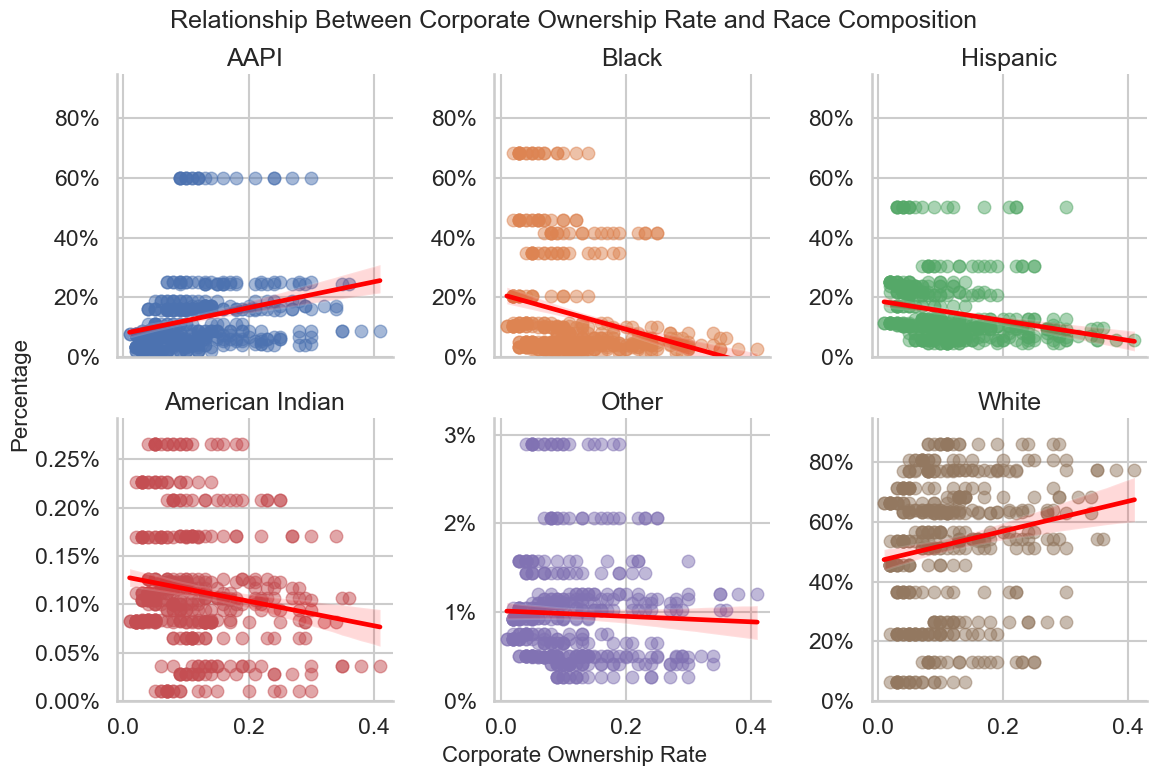

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Suppose you have loaded your data into a DataFrame named df
# Example: df = pd.read_csv("your_data.csv")

# For AAPI, calculate the overall count (children + adults)
df['aapi_total'] = df['aapi_0_17'] + df['aapi_18plus']

# Compute ethnicity percentages relative to the total population.
# tot_pop_all is assumed to represent the total population for all ethnicities.
df['aapi_pct'] = df['aapi_total'] / df['tot_pop_all']
df['black_pct'] = df['black_all'] / df['tot_pop_all']
df['hisp_pct']  = df['hisp_all'] / df['tot_pop_all']
df['aian_pct']  = df['aian_all'] / df['tot_pop_all']
df['other_pct'] = df['other_all'] / df['tot_pop_all']
df['white_pct'] = df['white_all'] / df['tot_pop_all']

# Remove missing or infinite values that might occur from division
cols_required = ['aapi_pct', 'black_pct', 'hisp_pct', 'aian_pct', 'other_pct', 'white_pct', 'corp_own_rate']
df = df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=cols_required)

# Melt the DataFrame so that each ethnic percentage is in one row.
ethnicity_cols = ['aapi_pct', 'black_pct', 'hisp_pct', 'aian_pct', 'other_pct', 'white_pct']
df_melt = df.melt(
    id_vars=['corp_own_rate'],
    value_vars=ethnicity_cols,
    var_name='Ethnicity',
    value_name='Percentage'
)

# Map column names to friendlier ethnicity labels.
ethnicity_labels = {
    'aapi_pct': 'AAPI',
    'black_pct': 'Black',
    'hisp_pct': 'Hispanic',
    'aian_pct': 'American Indian',
    'other_pct': 'Other',
    'white_pct': 'White'
}
df_melt['Ethnicity'] = df_melt['Ethnicity'].map(ethnicity_labels)

# Create a faceted lmplot with sharey=False to allow independent y-axis scales.
sns.set(style="whitegrid", context="talk")
g = sns.lmplot(
    data=df_melt,
    x='corp_own_rate',
    y='Percentage',
    col='Ethnicity',
    hue='Ethnicity',
    col_wrap=3,             # Wrap facets into up to 3 columns per row
    height=4,               # Height of each facet
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    sharey=False            # Allow each facet to have its own y-axis scale
)

# Compute individual y-axis limits:
# For the shared groups (AAPI, Black, Hispanic, White) use a common maximum.
shared_groups = ['AAPI', 'Black', 'Hispanic', 'White']
shared_max = max(df_melt[df_melt['Ethnicity'].isin(shared_groups)]['Percentage']) * 1.1

# Individual maximums for American Indian and Other
aian_ymax = df_melt[df_melt['Ethnicity'] == 'American Indian']['Percentage'].max() * 1.1
other_ymax = df_melt[df_melt['Ethnicity'] == 'Other']['Percentage'].max() * 1.1

# Adjust each facet's y-axis based on Ethnicity and format tick labels as percentages.
for ax in g.axes.flatten():
    title = ax.get_title()  # e.g., "Ethnicity = American Indian"
    if "American Indian" in title:
        ax.set_ylim(0, aian_ymax)
        #set y axis to 2 decimal places
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
    elif "Other" in title:
        ax.set_ylim(0, other_ymax)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    else:
        ax.set_ylim(0, shared_max)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Remove individual facet axis labels
g.set_xlabels("")
g.set_ylabels("")

g.set_titles("{col_name}") 
# Add a single, common x-axis label and y-axis label to the figure.
g.fig.text(0.5, 0.04, "Corporate Ownership Rate", ha='center', fontsize=16)
g.fig.text(0.03, 0.5, "Percentage", va='center', rotation='vertical', fontsize=16)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship Between Corporate Ownership Rate and Race Composition", fontsize=18)

plt.show()

# Save the plot to a file
g.savefig("corporate_ownership_vs_ethnicity.png")


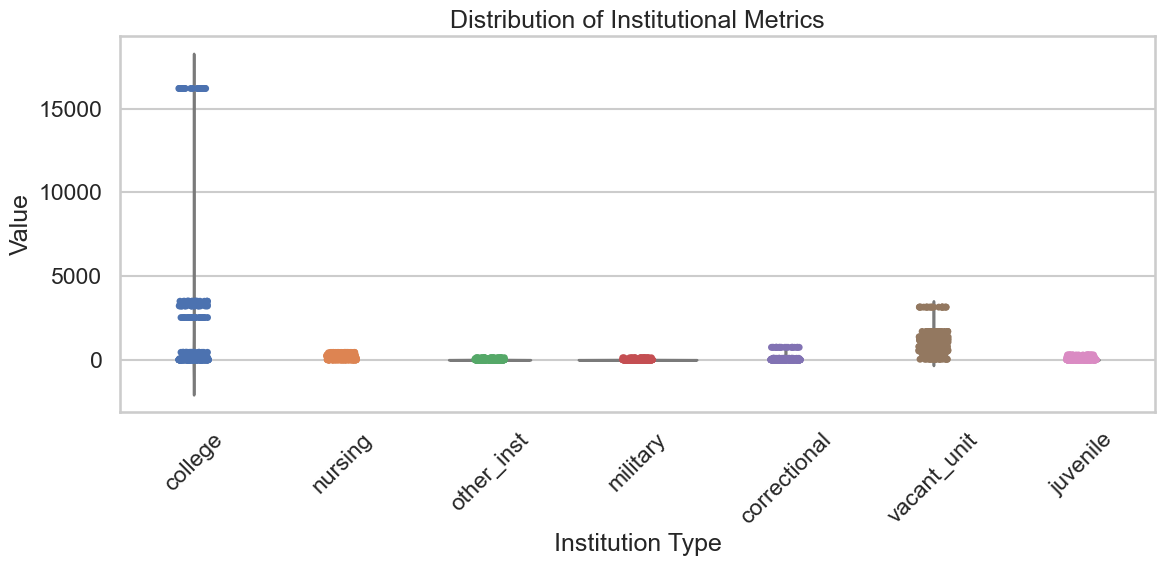

<Figure size 640x480 with 0 Axes>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have loaded your data into a DataFrame named df
# Example: df = pd.read_csv("your_data.csv")

# Define the institutional columns of interest
inst_vars = ["college", "nursing", "other_inst", "military", "correctional", "vacant_unit", "juvenile"]

# Melt the DataFrame so that each institutional metric is in one row.
df_inst = df.melt(
    value_vars=inst_vars,
    var_name="Institution",
    value_name="Value"
)

# Remove missing values that might exist.
df_inst = df_inst.dropna(subset=["Value"])

# Set the aesthetic style of the plots.
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))

# Create a violin plot to show distribution of values for each institution.
ax = sns.violinplot(x="Institution", y="Value", data=df_inst, inner=None, color=".8")

# Overlay with a strip plot to display individual datapoints.
ax = sns.stripplot(x="Institution", y="Value", data=df_inst, jitter=True, hue="Institution", dodge=False)

# Remove the legend generated from the hue parameter.

# Customize the x-axis labels for better readability.
plt.xticks(rotation=45)
plt.xlabel("Institution Type")
plt.ylabel("Value")
plt.title("Distribution of Institutional Metrics")

plt.tight_layout()
plt.show()

# Optionally, you can save the plot to a file.
plt.savefig("institutional_metrics_distribution.png")